In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
repos = pd.read_csv('repos_info.csv')
commits = pd.read_csv('commits_info.csv')

In [3]:
print("Total repos till date: {}".format(repos.shape[0]))
print("Total commits till date: {}".format(commits.shape[0]))

Total repos till date: 21
Total commits till date: 408


In [4]:
repos.describe()

,Id,License,Forks count,Issues count,Stars count,Watchers count
count,2.100000e+01,0.0,21.000000,21.0,21.000000,21.000000
mean,1.502904e+08,NaN,0.095238,0.0,0.238095,0.238095
std,4.367664e+07,NaN,0.300793,0.0,0.436436,0.436436
min,8.846237e+07,NaN,0.000000,0.0,0.000000,0.000000
25%,1.192473e+08,NaN,0.000000,0.0,0.000000,0.000000
50%,1.300822e+08,NaN,0.000000,0.0,0.000000,0.000000
75%,1.945016e+08,NaN,0.000000,0.0,0.000000,0.000000
max,2.221807e+08,NaN,1.000000,0.0,1.000000,1.000000


In [5]:
print("Two most common commit messages: {}".format(' and '.join(commits['Message'].value_counts().index[:2])))

Two most common commit messages: Update README.md and Initial commit


In [6]:
commits_count = pd.DataFrame(pd.merge(repos, 
         commits, 
         left_on='Id', 
         right_on='Repo Id', 
         how = 'left').groupby('Id').size().reset_index())
commits_count.columns = ['Id', 'Commits count']

In [7]:
repos = pd.merge(repos, commits_count, on = 'Id')

Text(0.5, 1.0, 'Commits per repository')

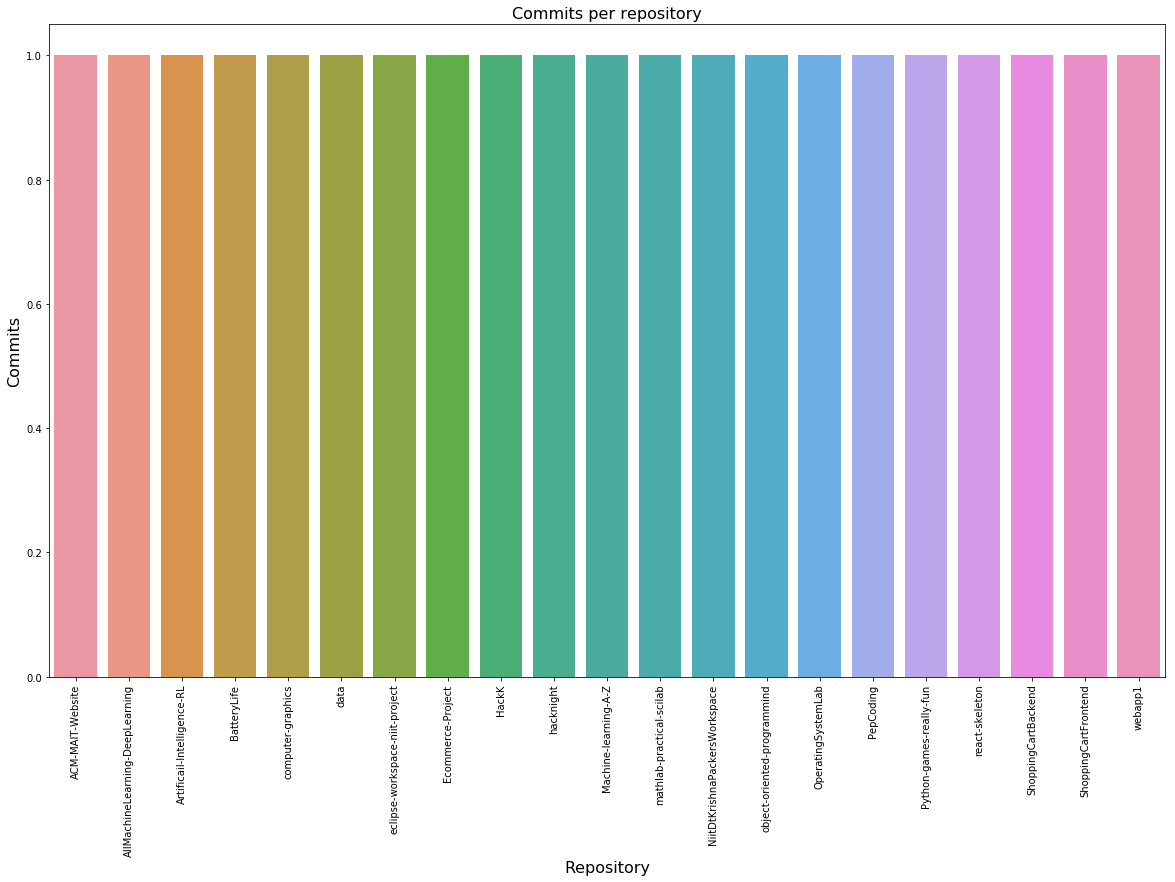

In [8]:
plt.figure(figsize = (20, 12))
sns.barplot(repos['Name'], repos['Commits count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

## Yearly analysis

In [9]:
commits['Year'] = commits['Date'].apply(lambda x: x.split('-')[0])
yearly_stats = commits.groupby('Year').count()['Commit Id']

Text(0.5, 1.0, 'Commits in each year')

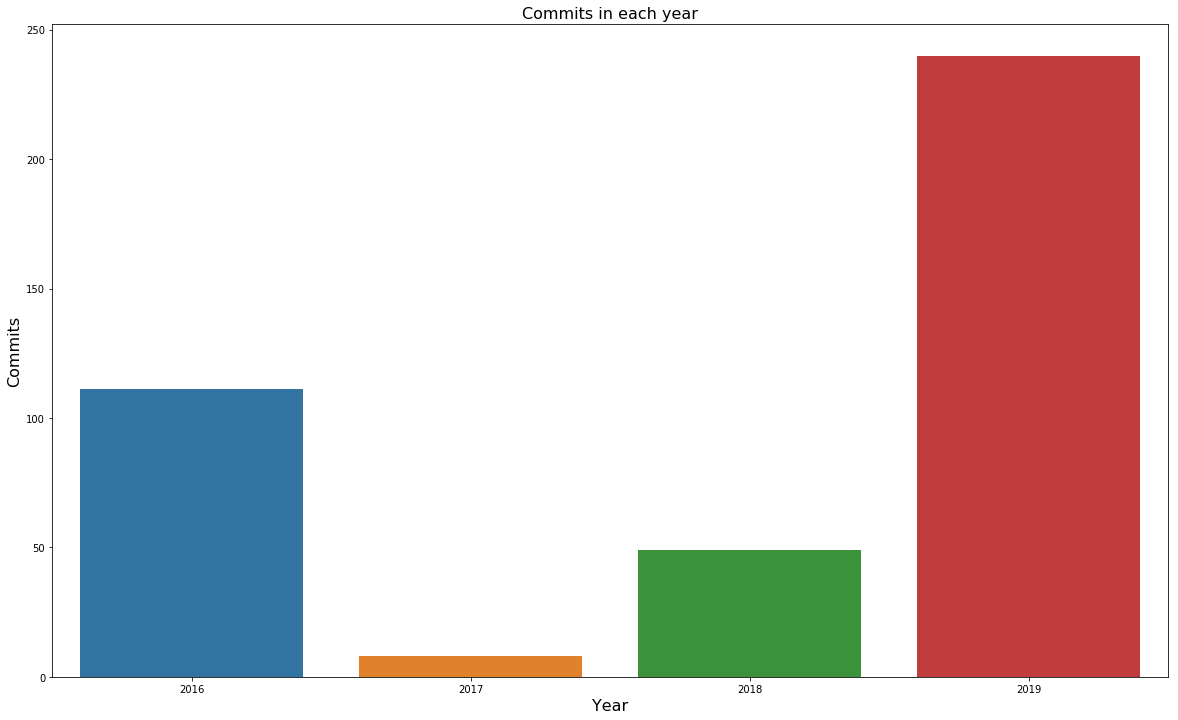

In [10]:
plt.figure(figsize = (20, 12))
sns.barplot(yearly_stats.index, yearly_stats.values)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each year", fontsize = 16)

It appers that I've had the maximum number of commits in the **Year 2019**.

In [11]:
commits['Month'] = commits['Date'].apply(lambda x: x.split('-')[1])
monthly_stats = commits[commits['Year'] == '2019'].groupby('Month').count()['Commit Id']

Text(0.5, 1.0, 'Commits in each month of 2019')

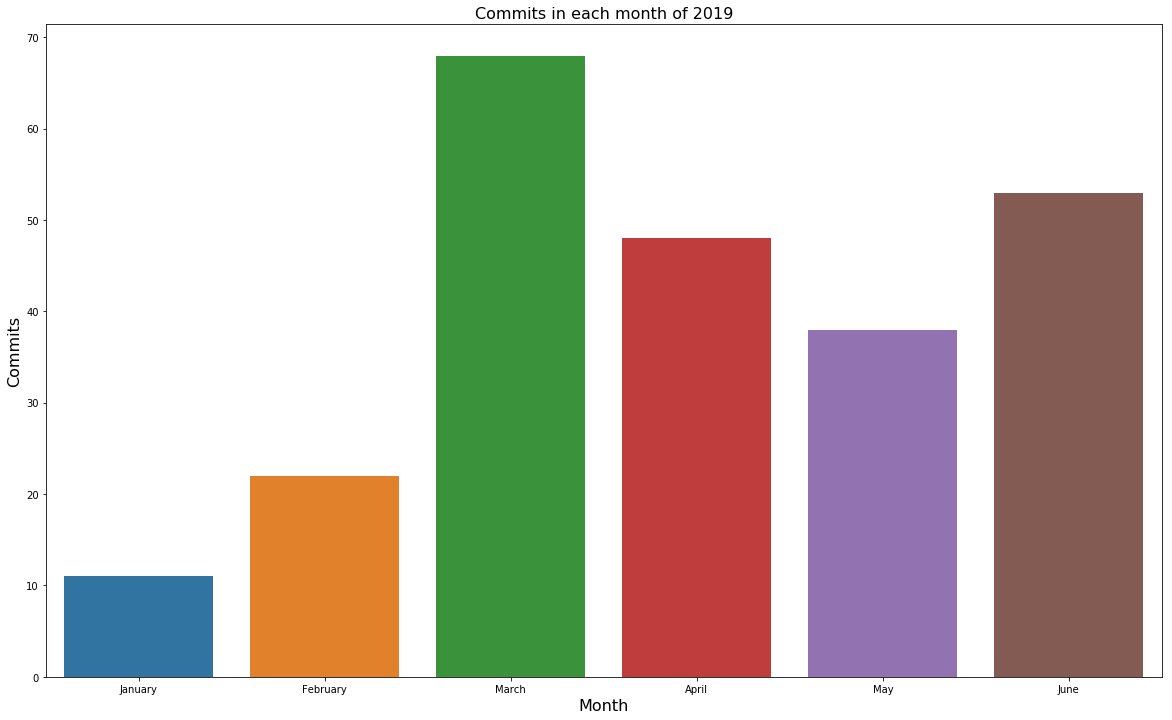

In [12]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June'}
labels = []
for value in monthly_stats.index:
    labels.append(month_mapper[value])

plt.figure(figsize = (20, 12))
plot = sns.barplot(monthly_stats.index, monthly_stats.values)
plt.xlabel("Month", fontsize = 16)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in each month of 2019", fontsize = 16)

In [13]:
commits['Date only'] = pd.to_datetime(commits['Date'].apply(lambda date: date.split('T')[0]))
commit_stats = commits[(commits['Year'] == '2019')
                       & (commits['Month'] == '03')]['Date only'].value_counts().sort_index()

Text(0.5, 1.0, 'Commits in March, 2019')

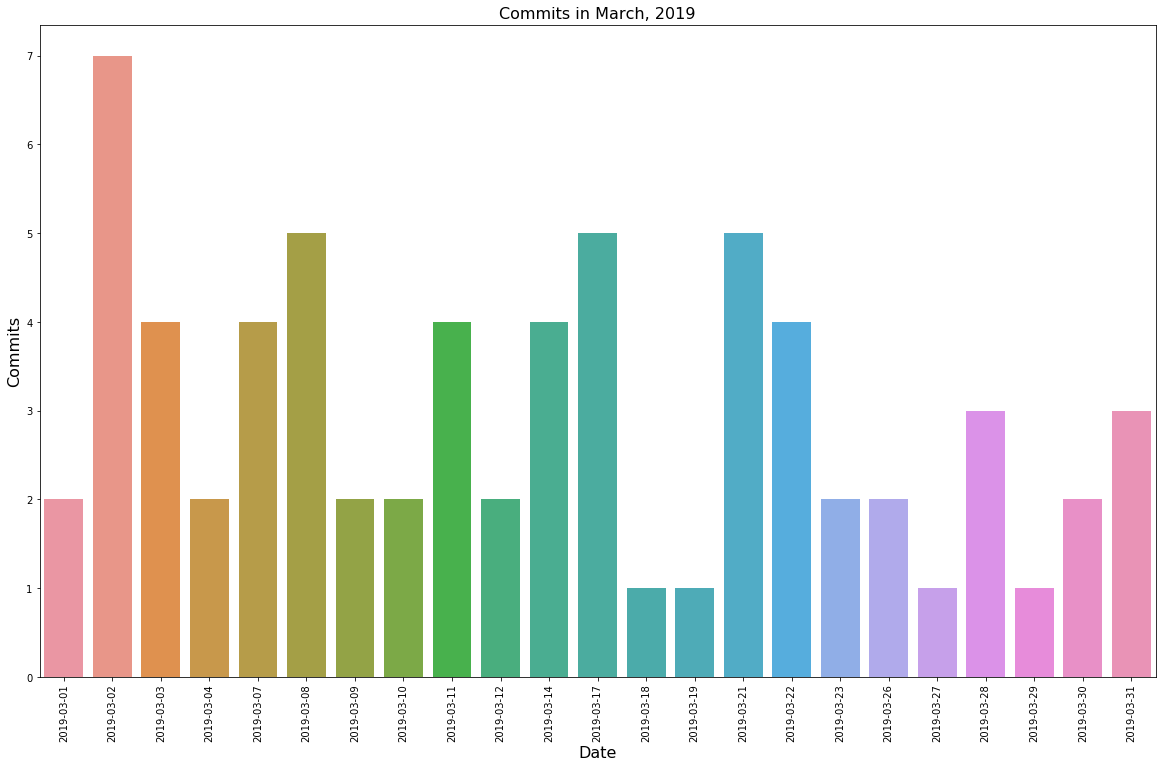

In [14]:
labels = []
for value in commit_stats.index:
    labels.append(value.date())
    
plt.figure(figsize = (20, 12))
plot = sns.barplot(commit_stats.index, commit_stats.values)
plt.xlabel("Date", fontsize = 16)
plt.xticks(rotation = 90)
plot.set_xticklabels(labels)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits in March, 2019", fontsize = 16)

I made maximum commits on the **2nd of March 2019**.

In [15]:
list_of_languages = []
for languages in repos['Languages']:
    if type(languages) == str:
        for language in languages.split(','):
            list_of_languages.append(language.strip())

Text(0.5, 1.0, 'Language distribution amongst all repositories')

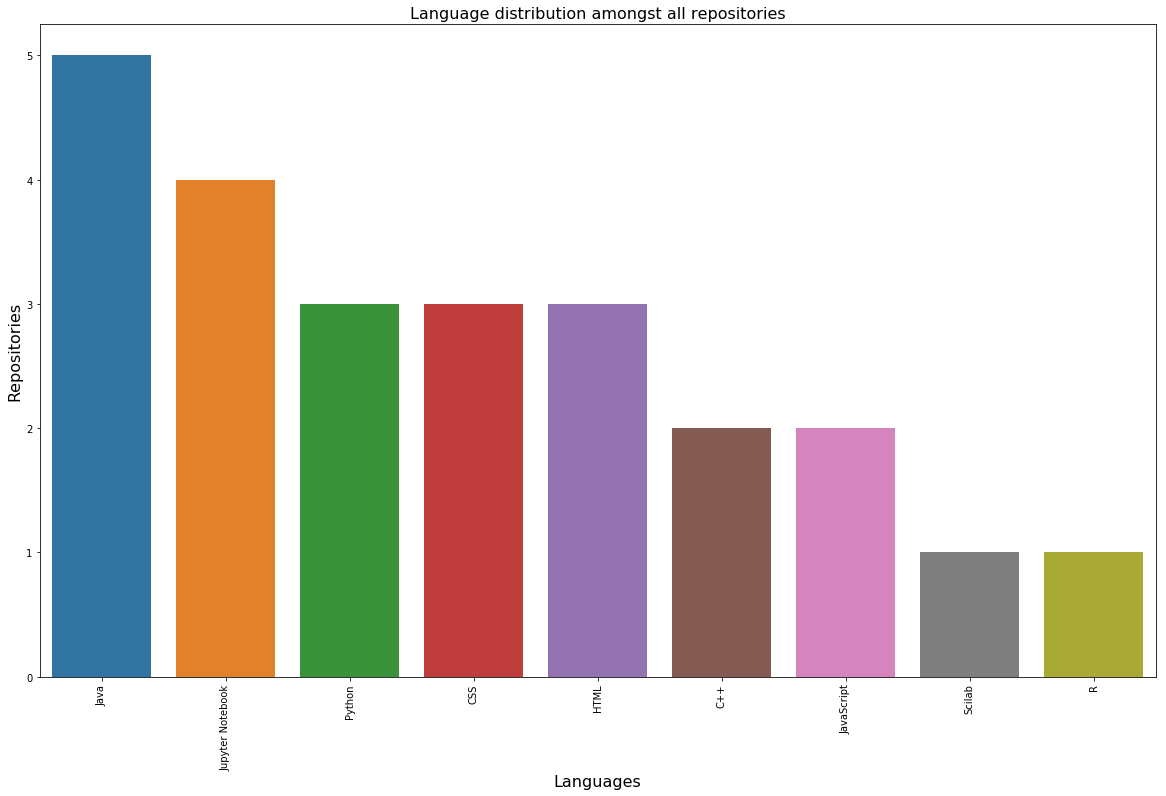

In [16]:
languages_count = pd.Series(list_of_languages).value_counts()

plt.figure(figsize = (20, 12))
sns.barplot(languages_count.index, languages_count.values)
plt.xlabel("Languages", fontsize = 16)
plt.xticks(rotation = 90)
plt.ylabel("Repositories", fontsize = 16)
plt.title("Language distribution amongst all repositories", fontsize = 16)